<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/Transfer_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2

# Загрузка предобученной модели MobileNetV2 без верхних слоев
pre_trained_model = MobileNetV2(input_shape=(224, 224, 3),
                                   include_top=False,
                                   weights='imagenet')

# Замораживаем веса предобученной модели
for layer in pre_trained_model.layers:
  layer.trainable = False

# Проверка структуры модели
pre_trained_model.summary()

# Выбор последнего слоя для подключения новых слоев
last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [22]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)

model = Model( pre_trained_model.input, x)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (224, 224))

--2024-04-21 14:01:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.3MB/s    in 3.9s    

2024-04-21 14:01:43 (16.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit(
       train_generator,
       validation_data=validation_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_steps=50,
       verbose=2)

Epoch 1/20
100/100 - 30s - loss: 0.8438 - accuracy: 0.9410 - val_loss: 0.3479 - val_accuracy: 0.9670 - 30s/epoch - 298ms/step
Epoch 2/20
100/100 - 29s - loss: 0.3829 - accuracy: 0.9485 - val_loss: 0.0939 - val_accuracy: 0.9790 - 29s/epoch - 293ms/step
Epoch 3/20
100/100 - 29s - loss: 0.2381 - accuracy: 0.9480 - val_loss: 0.1557 - val_accuracy: 0.9700 - 29s/epoch - 289ms/step
Epoch 4/20
100/100 - 29s - loss: 0.2124 - accuracy: 0.9475 - val_loss: 0.0872 - val_accuracy: 0.9810 - 29s/epoch - 294ms/step
Epoch 5/20
100/100 - 29s - loss: 0.2344 - accuracy: 0.9560 - val_loss: 0.2013 - val_accuracy: 0.9720 - 29s/epoch - 293ms/step
Epoch 6/20
100/100 - 29s - loss: 0.2638 - accuracy: 0.9590 - val_loss: 0.1058 - val_accuracy: 0.9740 - 29s/epoch - 288ms/step
Epoch 7/20
100/100 - 30s - loss: 0.2004 - accuracy: 0.9535 - val_loss: 0.1195 - val_accuracy: 0.9790 - 30s/epoch - 297ms/step
Epoch 8/20
100/100 - 29s - loss: 0.1803 - accuracy: 0.9605 - val_loss: 0.0858 - val_accuracy: 0.9830 - 29s/epoch - 287

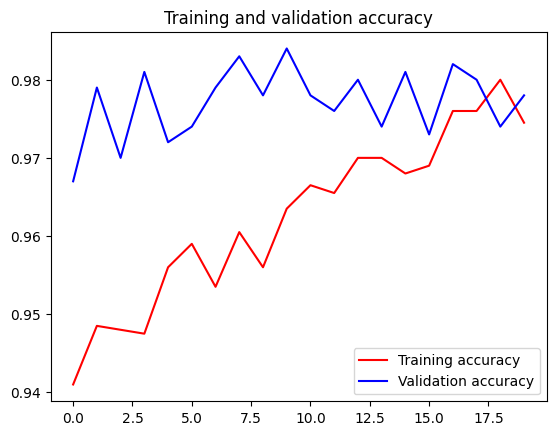

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()